# Biblioteki

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# XGBoost

XGBoost (eXtreme Gradient Boosting) to zaawansowana implementacja algorytmu gradientowego wzmacniania drzew (Gradient Boosted Trees), który jest szeroko stosowany w konkursach na platformie Kaggle ze względu na swoją wysoką wydajność i elastyczność.

XGBoost polega na tworzeniu serii drzew, które są sumowane, aby uzyskać ostateczne przewidywanie. Każde kolejne drzewo stara się poprawić błędy poprzednich drzew, stosując technikę nazywaną "wzmacnianiem gradientowym".

## Dane

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, random_state=1) # generuje syntetyczny zbiór danych do analizy regresji

In [ ]:
y

## Podział na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Prosty XGBoost

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Inicjalizacja listy drzew

trees = []
n_trees = 100 # M - liczba iteracji (słabych uczniów)
learning_rate = 0.1

In [ ]:
# I. Inicjalizacja modelu stałymi wartościami
## Początkowy wektor prognoz

y_pred_train = np.zeros_like(y_train)

In [ ]:
y_pred_train

In [ ]:



# II. Iteracyjny proces uczenia

for i in range(n_trees):

    # g - obliczanie gradientów (hesiany = 1)
    print(f'Iteracja {i}\n')
    residuals = y_train - y_pred_train

    print(f'g = {residuals[:5]}')

    # słaby uczeń
    tree = DecisionTreeRegressor(max_depth=3)
    # dopasowanie/trenowanie słabego ucznia na X i resztach
    tree.fit(X_train, residuals)

    # przewidywania fm
    pred = tree.predict(X_train)

    print(f'fm = {pred[:5]}')

    # Aktualizacja wektora prognoz/modelu Fm:
    y_pred_train += learning_rate * pred

    print(f'Fm = {y_pred_train[:5]}', '\n\n')


    # Dodanie drzewa do listy drzew:
    trees.append(tree)

Iteracja 0

g = [190.10928037 104.8868832   30.02822234  10.72475602  32.68528651]
fm = [165.10726767 103.61778111  28.84812535 -12.2514652   28.84812535]
Fm = [16.51072677 10.36177811  2.88481253 -1.22514652  2.88481253] 


Iteracja 1

g = [173.5985536   94.52510509  27.1434098   11.94990254  29.80047397]
fm = [170.64711326 111.10895956  24.92167191 -12.80716323  24.92167191]
Fm = [33.57543809 21.47267407  5.37697973 -2.50586284  5.37697973] 


Iteracja 2

g = [156.53384227  83.41420913  24.65124261  13.23061886  27.30830678]
fm = [134.65049477  83.81916901  23.47114562 -15.16191375  23.47114562]
Fm = [47.04048757 29.85459097  7.72409429 -4.02205422  7.72409429] 


Iteracja 3

g = [143.0687928   75.03229223  22.30412805  14.74681023  24.96119222]
fm = [121.18544529  70.91895482  10.79500034  10.79500034  35.14021755]
Fm = [59.1590321  36.94648645  8.80359432 -2.94255418 11.23811604] 


Iteracja 4

g = [130.95024827  67.94039675  21.22462802  13.6673102   21.44717046]
fm = [127.9988079

### Wyświetlanie pierwszego i ostatniego drzewa

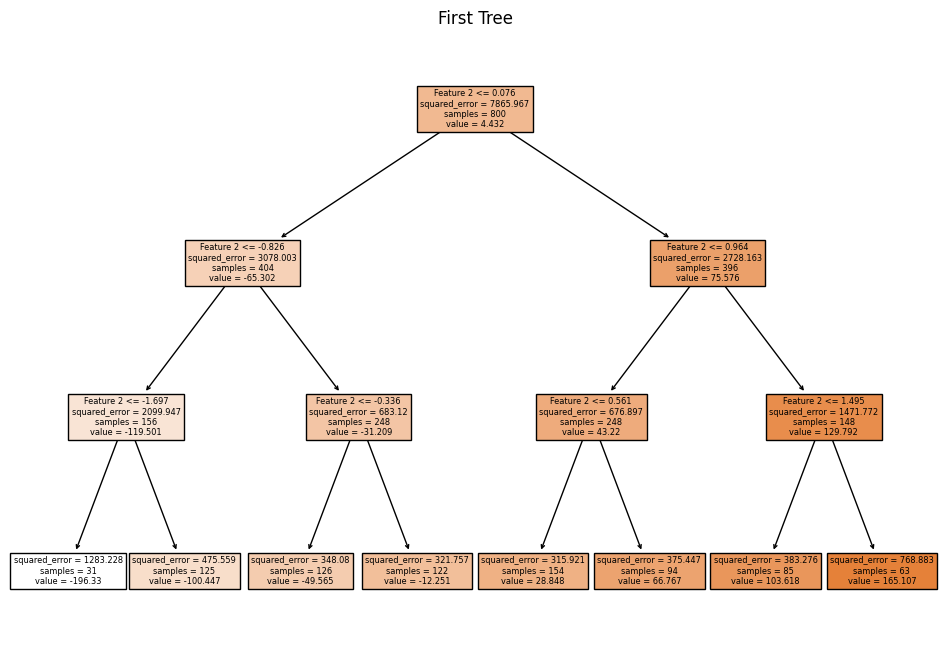

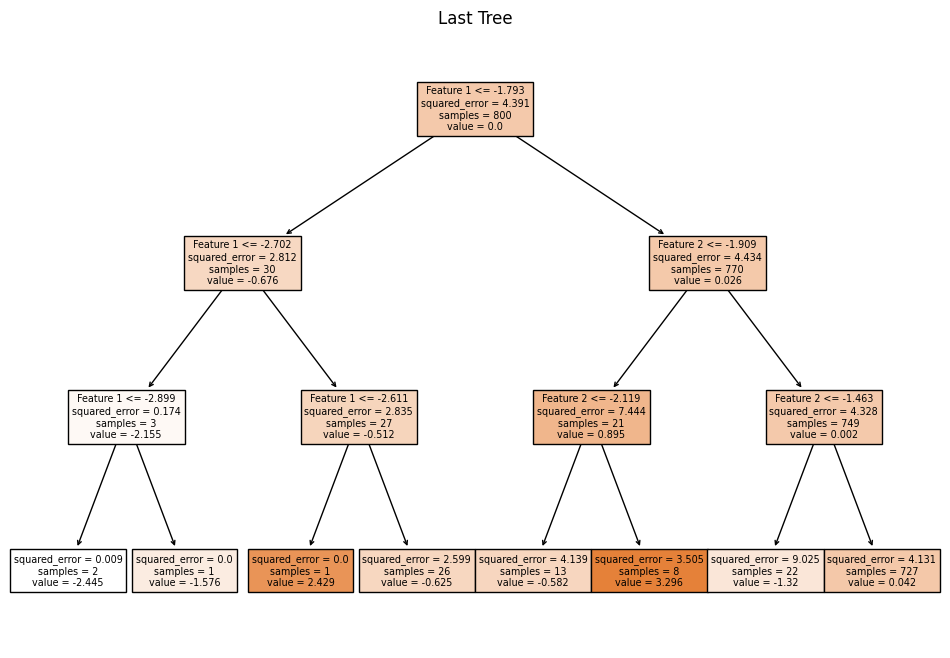

In [ ]:
from sklearn.tree import plot_tree

# Rysowanie pierwszego drzewa
first_tree = trees[0]
plt.figure(figsize=(12, 8))
plot_tree(first_tree, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.title("First Tree")
plt.show()

# # Rysowanie środkowego drzewa
# first_tree = trees[49]
# plt.figure(figsize=(12, 8))
# plot_tree(first_tree, filled=True, feature_names=["Feature 1", "Feature 2"])
# plt.title("Middle Tree")
# plt.show()

# Rysowanie ostatniego drzewa
last_tree = trees[-1]
plt.figure(figsize=(12, 8))
plot_tree(last_tree, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.title("Last Tree")
plt.show()

# Wczytywanie zbiory danych

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head(3)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df['class'] = df['Class'].astype('category').cat.codes   # dodanie kolumny i zamiana na 1 i 0
# .cat.codes: przypisuje kodową reprezentację wartości kategorialnych z kolumny "Class" do nowej kolumny.
# Kody te są liczbowymi indeksami przypisanymi do każdej unikalnej wartości w kolumnie "Class".

In [ ]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class,class
0,6,148,72,35,0,33.6,0.627,50,positive,1
1,1,85,66,29,0,26.6,0.351,31,negative,0
2,8,183,64,0,0,23.3,0.672,32,positive,1
3,1,89,66,23,94,28.1,0.167,21,negative,0
4,0,137,40,35,168,43.1,2.288,33,positive,1


In [ ]:
classes = df.pop('Class').unique()  # wycina zmienną Class z df i zwraca unikalne klasy z kolumny Class
X = df.copy()
y = X.pop('class')


In [ ]:
classes

array(['positive', 'negative'], dtype=object)

In [ ]:
X.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int8

In [ ]:
y.value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Podział zbioru na testowy i treningowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=30)  # strtyfy - zachować stosunek 0 do 1

In [ ]:
y.value_counts()

In [ ]:
268/500

In [ ]:
for subset in [X, y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(768, 8)
(768,)
(537, 8)
(537,)
(231, 8)
(231,)


In [ ]:
y_train.value_counts()

class
0    350
1    187
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

class
0    150
1     81
Name: count, dtype: int64

In [ ]:
print(f'train {187/350}, test {81/150}')  #stosunek 0 do 1 w zbiorach

train 0.5342857142857143, test 0.54


## Bilioteka

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

## Trenowanie modelu

- **learning_rate / eta** – parametr mówiący po każdej wyliczonej iteracji, jaki krok chcemy dać do przodu. Im większy krok, tym szybciej zbliżamy się do celu, ale jeśli będzie zbyt duży, to możemy nie dojść do najlepszego wyniku.

- **max_depth** – maksymalna głębokość prostych drzew. Głębsze drzewa - model jest mocniejszy, ale ma też większą tendencję do przeuczenia się.

- **n_estimators** – liczba prostych drzew, które chcemy zbudować.

- **min_child_weight** – mówi o minimalnej liczbie obserwacji w każdym liściu drzewa. Im większa waga, tym model bardziej konserwatywny – potrzebujemy większej wagi, aby dokonać danego podziału.



In [ ]:
model_xgb = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.01)
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Predykcja

In [ ]:
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

In [ ]:
y_pred_train

## Miary jakości klasyfikacji

### Macierz pomyłek

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[340,  10],
       [ 33, 154]])

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[121,  29],
       [ 31,  50]])

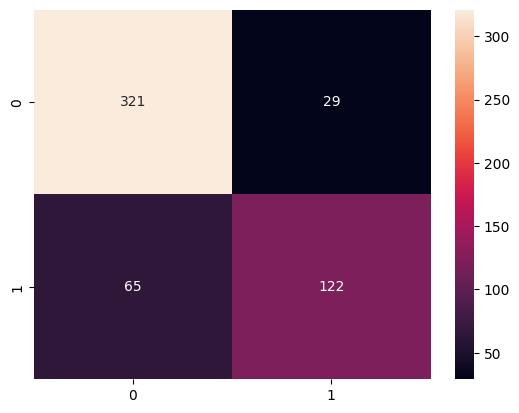

In [ ]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix, annot = True, fmt ='d')
plt.show()

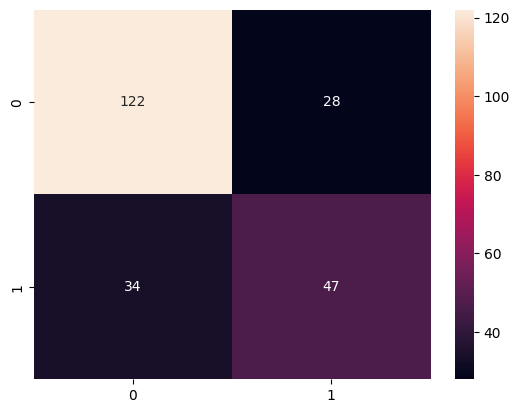

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot = True, fmt ='d')
plt.show()

### Inne metryki

<img src='https://i.stack.imgur.com/U0hjG.png' width=300>


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('recall: ', recall_score(y_train, y_pred_train), '\n',
     'precision: ', precision_score(y_train, y_pred_train), '\n',
     'f-score: ', f1_score(y_train, y_pred_train))

recall:  0.6524064171122995 
 precision:  0.8079470198675497 
 f-score:  0.7218934911242604


In [ ]:
print('recall: ', recall_score(y_test, y_pred_test), '\n',
     'precision: ', precision_score(y_test, y_pred_test), '\n',
     'f-score: ', f1_score(y_test, y_pred_test))

recall:  0.5802469135802469 
 precision:  0.6266666666666667 
 f-score:  0.6025641025641025
